**<h1><font color="darkred">Correction notebooks on hands-on session on fundamental of statistics</font></h1>**

**Welcome to this session**

We will use this notebook to practice together with statistics and data anlaysis for **SOS 2022**.


## <font color="darkred">My own big summary of statistics and probabilities</font>

**Everything about probability** and statistics is fundamentally about a random outcome (*i.e.* on which you don't have full control), and the set of possibilities it should belong to.



**To analyze things** in terms of probability and statistics is to locate an occurrence in terms of its weight in a given set of possible outcomes.

**To get a meaning** of the part in the whole, you must define the whole. And everything is there. Remember. Everything is there. Class of distributions, model definition, model and data adequacy, classification and so on. The fundamental question is: what are the potential outcomes?

**Whatever flavour** you like, Bayesian, Frequentists, Machine Learning setups have a prioris. Define a sample space, a broad class of possibilities, and find a more specific one in this set to explain the observed data collection to gain insight or predict new outcomes. Starting from a class of probabilities is already an a priori on the problem.

Enough of generic, but fundamental concepts, **let's get down to business**!!!


## <font color="darkred">Using Colaboratory</font>

Use *Google Chrome* browser and Google Colaboratory.



The practice environement - Colaboratory
**Colaboratory** = python notebooks (Jupyter) on Google servers. Convenient to share, teach, provide demonstrations... Only suited for small projects or small code. Otherwise use development environment on your computer (Atom, Pycharm, Spyder, Sublime Text,...). You can still develop large python classes and scripts (`.py` files) upload them on Google Drive and call them in your notebooks...

Main **purpose** of Colaboratory is thus: **work together and share**.
Advantages:
* Write and execute python code in your web browser (even on smartphones, tablets,...)
* Create/upload and share notebooks
* Import and save notebooks from/to Google Drive or GitHub
* Plus a lot of extras: import export datas (pandas, tensorflow, keras, use provided GPU or TPU by Google) etc..

**A python notebook** is a file (usually ".ipynb") with both `TEXT` and `CODE`, splitted in separate cells which forms the notebook. `TEXT` cells help describe the frame and the computations for demonstration purposes. `CODE` cells are executable and can share variables in the notebook workspace environement (kernel) and produce outputs (printing, tables, graphics). That's all to start with.

<font color="chocolate">**NOTES**</font>: 
1. I recommend to **switch the Colab language to English**. For this, click on the Colab `Help` from the menubar and select the last line telling you to `switch to English`.

2. To work with this notebook, you have to save it in your Google Drive. Go to "File > Save a Copy in Drive". You are done. 




---

# **<font color="darkred">Outline</font>**

<font color="gray">We will cover the following:</font>
<a name="index"></a>
1. [Probabilities](#probabilities): most standard ones and properties.
2. [Sampling](#sampling): getting outcomes.
3. [Statistical inference](#inference): from generic class of models to a specific one.

<font color="gray">Note: below the icon [🔼](#index) moves back to this index.</font>

---

# <font color="darkred">**Basic module loadings**</font>

Module loading. Use of:
- `numpy`: mostly for mathematical functions & numeric arrays;
- `scipy`: mostly `scipy.stats` & `scipy.optimize`;
- `matplotlib`: for plotting




In [1]:
import numpy as np  # handles most of the numerical work
import scipy.stats  # implements statistical tools (PDFs, etc)
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline

#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# matplotlib related
plt.style.use('ggplot')
# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
#get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.colors as colors
colors.TABLEAU_COLORS;

---

<a name="probabilities"></a>

# <font color="darkred">**I. Probability**</font> [🔼](#index)

Before doing statistics and inference, we need to set up probabilities. We start with usual ones:
- Binomial ${\cal B}(N,p)$: `scipy.stats.binom`
- Poisson ${\cal P}(\lambda)$: `scipy.stats.poisson`
- Normal ${\cal N}(\mu,\sigma^2)$: `scipy.stats.norm`
- Chi square $\chi^2(n_{\rm dof})$: `scipy.stats.chi2`

During the [statistics lectures of R. Madar](https://indico.in2p3.fr/event/26179/timetable/#1-basic-concepts-of-statistics), you have seen a couple of **distributions** and properties.

**Probabilities** are used to model the **random errors** from the measurements in Physics experiment.  
Two basic nature of errors: **continuous** and **discrete**.

Distribution probabilities may be found in `scipy.stats`. 
For each probability distribution, you can access  to *METHODS*:
> * Probability density function (PDF, continuous case) or mass function (PMF, discrete case): `pdf` or `pmf`  
> * Cumulative distribution function (CDF): `cdf`  
> * Quantile function (functional inverse of the CDF. Percent point function): ` ppf`  
> * Median, mean, variance, standard deviation: `median`, `mean`, `var`, `std`  
> * Random variates: `rvs`  

For each of these methods, you might provide some arguments:
- `loc=...` to specify the x location of the distribution;
- `scale=...` to stretch the distribution on x axis;
- `size=...` in conjunction with `rvs` to generate a sample of a given size.

To get help, you can write this in the notebook `scipy.stats.norm?` and hit `[SHIFT]`+`[RETURN]` on your keyboard or execute the cell with the 'Play' icon, `(▶)`, on the left of the cell code.


In [2]:
scipy.stats.norm?

or just start writing `scipy.stats.norm(` with the cursor being after the opening parenthesis and hit `[TAB]` on your keyboard 

<font color="gray">(NOTE: for this to work, please ensure that in `Tools > Settings > Editor` the option "Automatically trigger code completions" is unchecked)</font>

In [3]:
scipy.stats.norm()

## <font color="darkred">Tabulated distributions - howtos</font>

<font color="chocolate">*Objectives:*</font>
Plotting probability density or mass functions of standard distributions


First, you want to know the available distributions?

In [ ]:
# Hit TAB key in the following line after the dot of stats. You should see a
# popup scrolling window 
# Note: If not, check in the menu of Colab : Tools > Setting > Editor
# option "Automatically trigger code completions" should be unchecked
# Save the setting changes if any. 
scipy.stats.

Alternatively, you can use the `scipy.stats` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to access the descriptions with a better display formatting... Up to you...

## <font color="darkred">Plotting distributions</font>

<font color="chocolate">*Objectives:*</font> discover `scipy.stats` package. Plot probability distributions.

In [6]:
xvals = np.linspace(-5, 5, 250) # an array of 250 points between -5 and 5 which will be used for plotting
means = [0.0, -1.0, 2.0]   # a few mean values to plot - location parameter

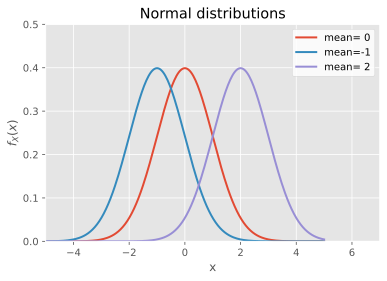

In [7]:
for mean in means:
    yvals = scipy.stats.norm.pdf(xvals, loc=mean) # compute the y-values for each x
    plt.plot(xvals, yvals, label=f'mean={mean:>-2g}', linewidth=2) # draw the plots

# Some plotting adjustements
plt.xlim(-5, 7)    # adjust the x range
plt.ylim(0, 0.5)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('$f_X(x)$') # Standard notation for probability density function f_X
plt.title('Normal distributions')
plt.legend(facecolor='white');

Now repeat with different widths:

In [8]:
sigmas = [1.0, 2.0, 3.0]   # a few sigma values to plot

Make similar plots as above for the provided sigma values and zero mean   

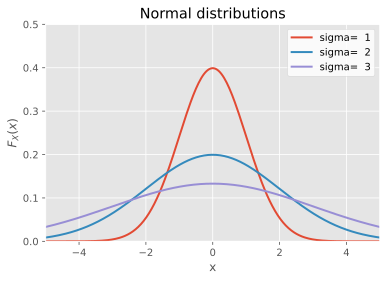

In [9]:
for sigma in sigmas:
  yvals = [ scipy.stats.norm.pdf(xval, loc=0, scale=sigma) for xval in xvals ] # compute the y-values for each x
  plt.plot(xvals, yvals, label=f'sigma={sigma:>3g}', linewidth=2)

# Some plotting adjustements
plt.xlim(-5, 5)    # adjust the x range
plt.ylim(0, 0.5)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('$F_X(x)$') # Standard notation for probability cumulative function F_X
plt.title('Normal distributions')
plt.legend(facecolor='white');

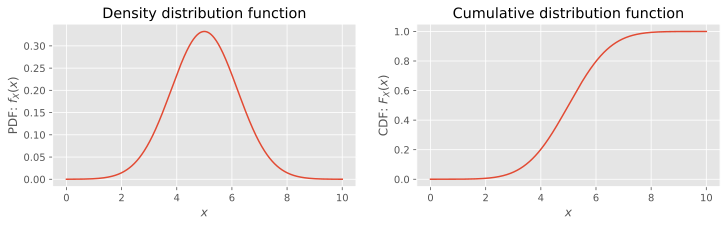

In [10]:
# X variable should contain the normal distribution from stats package.
mu = 5
sigma = 1.2
X = scipy.stats.norm(loc=mu, scale=sigma)

x = np.linspace(0,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(x, X.pdf(x))
ax1.set_xlabel('$x$')
ax1.set_ylabel('PDF: $f_X(x)$')
ax1.set_title('Density distribution function')

ax2.plot(x, X.cdf(x))
ax2.set_xlabel('$x$')
ax2.set_ylabel('CDF: $F_X(x)$')
ax2.set_title('Cumulative distribution function');

**Quantiles** of a probability distribution $f_X$ are $x_\alpha$ values such that $F_X(x_\alpha)=\int_{-\infty}^{x_\alpha}f_X(u)\;du=\alpha$

so that

$$x_{\alpha} = F_X^{-1}(\alpha)$$

Plot the quantile distribution of $X$ defined previously (normal distribution with mean `mu` and standard deviation `sigma`).

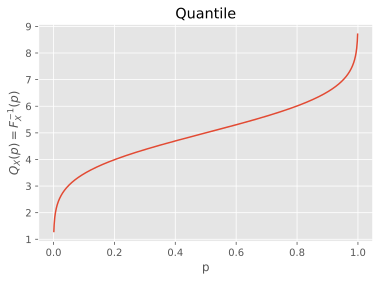

In [11]:
p = np.linspace(0, 1, 1_000)
  
plt.plot(p, scipy.stats.norm.ppf(p, mu, sigma))
  
plt.xlabel('p')
plt.ylabel('$Q_X(p)=F_X^{-1}(p)$')
plt.title('Quantile');

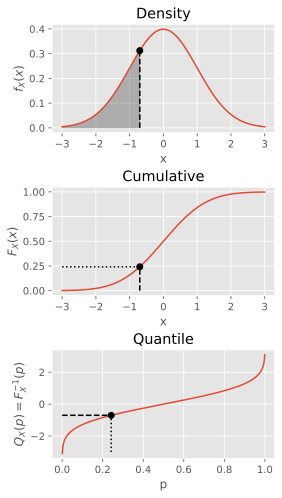

In [12]:
#@title  { run: "auto", vertical-output: true }
#z0 = -0.7

# To have fun with sliders, uncomment the line below
z0 = -0.7 #@param {type:"slider", min:-3, max:3, step:0.1}

# or you can use the "Insert > Add a form field" menu of Google Colab.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4,8))
plt.subplots_adjust(hspace=.5)
x = np.arange(-3,3,0.001)
mu = 0
sigma =1

z = x[x<z0]
f = scipy.stats.norm.pdf
f0 = f(z0, mu, sigma)
# EX
ax1.plot(x, f(x, mu, sigma))
# EX
ax1.fill_between(z, 0, f(z, mu, sigma), alpha=0.25, color='k')
ax1.plot(z0, f0, 'ko')
ax1.plot([z0, z0],[0, f(z0, mu, sigma)], 'k--')
ax1.set_xlabel('x')
ax1.set_ylabel('$f_X(x)$')
ax1.set_title('Density')

F = scipy.stats.norm.cdf
F0 = F(z0, mu, sigma)
# EX
ax2.plot(x, F(x, mu, sigma))
# EX
ax2.plot(z0, F0, 'ko')
ax2.plot([z0, z0],[0, F0], 'k--')
ax2.plot([-3, z0],[F0, F0], 'k:')
ax2.set_xlabel('x')
ax2.set_ylabel('$F_X(x)$')
ax2.set_title('Cumulative')

Q = scipy.stats.norm.ppf
p = np.linspace(0, 1, 1_000)
# EX
ax3.plot(p, Q(p, mu, sigma))
# EX
ax3.plot(F0, z0, 'ko')
ax3.plot([0, F0], [z0, z0], 'k--')
ax3.plot([F0, F0], [-3, z0], 'k:')
ax3.set_xlabel('p')
ax3.set_ylabel('$Q_X(p)=F_X^{-1}(p)$')
ax3.set_title('Quantile')
    
plt.show()

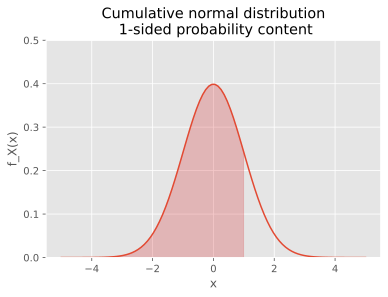

In [13]:
# One-sided probability content
xvals = np.linspace(-5, 5, 100)
yvals = [ scipy.stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.plot(xvals, yvals)
plt.ylim(0, 0.5)
plt.title("Cumulative normal distribution\n 1-sided probability content")
plt.xlabel('x')
plt.ylabel('f_X(x)')

# Now fill in part of the distribution
xup = 1
shaded_xvals = np.linspace(-5, xup, 100)
shaded_yvals = [ scipy.stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=.25, color='tab:red');

What is the probability content associated to the shaded region?

In [16]:
scipy.stats.norm.cdf(xup)

0.8413447460685429

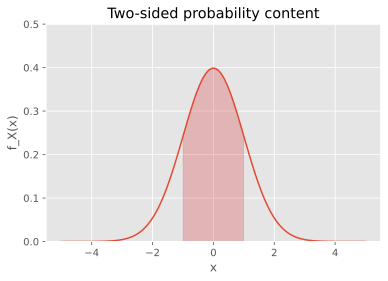

In [17]:
# Two-sided probability content
fig = plt.figure()
plt.plot(xvals, scipy.stats.norm.pdf(xvals)) # Can use the function(xvals) syntax for simplicity, same as [ function(xval) for xval in xvals ]
plt.ylim(0,0.5)
plt.title("Two-sided probability content")
plt.xlabel('x')
plt.ylabel('f_X(x)')

xlim = 1
shaded_xvals = np.linspace(-xlim,xlim,100)
plt.fill_between(shaded_xvals, scipy.stats.norm.pdf(shaded_xvals), alpha=0.25, color='tab:red');

What is the probability content associated to the shaded region?

In [18]:
scipy.stats.norm.cdf(xlim) - scipy.stats.norm.cdf(-xlim)

0.6826894921370859

Compute for the 5 bounding values: [1, 2, 3, 4, 5]
1. The lower one-sided probability content: $\int_{-\infty}^{\rm bound} f_X(u)\;du$

In [19]:
bounds = [1, 2, 3, 4, 5]

In [20]:
one_sided = scipy.stats.norm.cdf(bounds)
one_sided

array([0.84134475, 0.97724987, 0.9986501 , 0.99996833, 0.99999971])

2. The upper one-sided probability content: $\int_{\rm bound}^{+\infty} f_X(u)\;du$

In [21]:
one_sided_tail = scipy.stats.norm.sf(bounds)
one_sided_tail

array([1.58655254e-01, 2.27501319e-02, 1.34989803e-03, 3.16712418e-05,
       2.86651572e-07])

3. The two sided probability content: $\int_{-{\rm bound}}^{+{\rm bound}}f_{X}(u)\; du$ :

In [22]:
two_sided = [scipy.stats.norm.cdf(up) - scipy.stats.norm.cdf(-up) for up in bounds]
two_sided

[0.6826894921370859,
 0.9544997361036416,
 0.9973002039367398,
 0.9999366575163338,
 0.9999994266968562]

4. The probability content in the outer tails $\int_{-\infty}^{-{\rm bound}}f_{X}(u)\; du + \int_{+{\rm bound}}^{\infty} f_X(u)\; du$ :

In [23]:
two_sided_tail = [ scipy.stats.norm.sf(up) + scipy.stats.norm.cdf(-up) for up in bounds ]
two_sided_tail

[0.31731050786291415,
 0.04550026389635839,
 0.0026997960632601866,
 6.334248366623973e-05,
 5.733031437583866e-07]

In [24]:
# Printing the results:
import pandas as pd
data = np.array(np.round([ bounds, one_sided, one_sided_tail, two_sided, two_sided_tail ], 4)).T
labels = [ 'Bound', '1-sided', '1-tail', '2-sided', '2-tail' ]
pd.DataFrame(data, columns=labels)

,Bound,1-sided,1-tail,2-sided,2-tail
0,1.0,0.8413,0.1587,0.6827,0.3173
1,2.0,0.9772,0.0228,0.9545,0.0455
2,3.0,0.9987,0.0013,0.9973,0.0027
3,4.0,1.0000,0.0000,0.9999,0.0001
4,5.0,1.0000,0.0000,1.0000,0.0000


We find back the usual table of the standard normal distribution and associated probaility content from 1 to 5$\sigma$.

We now focus on the $\chi^2$ distribution, another important distribution for confidence intervals we will see later.

Plot the $\chi^2$ PDF for 1, 2, 3, 4, 5 degrees of freedom.

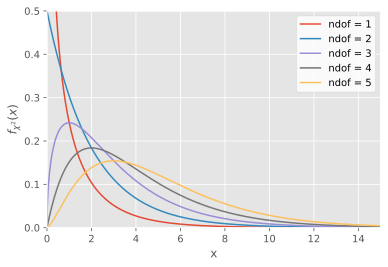

In [25]:
x = np.linspace(0, 15, 1_000)
for ndof in [1, 2, 3, 4, 5]:
  plt.plot(x, scipy.stats.chi2(ndof).pdf(x), label=f'ndof = {ndof}')

plt.xlabel('x')
plt.ylabel('$f_{\chi^2}(x)$')
plt.axis([0, 15, 0, .5])
plt.legend(facecolor= 'white');


Compute quantiles for 90%, 95%, 99% probability content and for 1 and 2 degrees of freedom.

In [26]:
bounds = [.9, .95, .99]
x2_1 = scipy.stats.chi2(1).ppf(bounds)
x2_2 = scipy.stats.chi2(2).ppf(bounds)

data = np.array(np.round([ bounds, x2_1, x2_2], 2)).T
labels = [ 'CL', '1 dof', '2 dof' ]
pd.DataFrame(data, columns=labels)

,CL,1 dof,2 dof
0,0.90,2.71,4.61
1,0.95,3.84,5.99
2,0.99,6.63,9.21


Do the same for "1, 2, 3, 4 and 5$\sigma$" probability content (Use the normal distribution to get the 2-sided probability content associated to n$\sigma$).

In [27]:
nsig = [1, 2, 3, 4, 5]

bounds = [scipy.stats.norm.cdf(s)-scipy.stats.norm.cdf(-s) for s in nsig]

x2_1 = scipy.stats.chi2(1).ppf(bounds)
x2_2 = scipy.stats.chi2(2).ppf(bounds)

data = np.array(np.round([ nsig, bounds, x2_1, x2_2], 2)).T
labels = ['sigmas', 'CL', '1 dof', '2 dof' ]
pd.DataFrame(data, columns=labels)

,sigmas,CL,1 dof,2 dof
0,1.0,0.68,1.0,2.30
1,2.0,0.95,4.0,6.18
2,3.0,1.00,9.0,11.83
3,4.0,1.00,16.0,19.33
4,5.0,1.00,25.0,28.74


For 1 degree of freedom, the "n$\sigma$" quantile of the $\chi^2$ is simply $n^2$.

## <font color="darkred">Playing with quantiles</font>

1. Plot the quantiles of a normal distribution ${\cal N}(\mu, \sigma)$ versus the standard normal ${\cal N}(0, 1)$ for $(\mu, \sigma)=\left\{(0,1), (2,1), (0,1/2)\right\}$


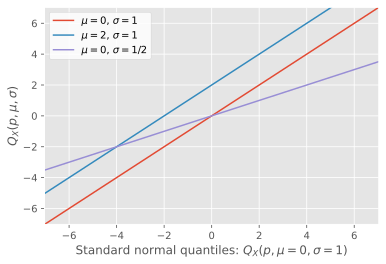

In [28]:
EPS = 1e-12
p = np.linspace(0+EPS, 1-EPS, 100)
Q = lambda mu, s: scipy.stats.norm(loc=mu, scale=s).ppf(p)
plt.plot(Q(0,1), Q(0,1), label=r"$\mu=0$, $\sigma=1$")
plt.plot(Q(0,1), Q(2,1), label=r"$\mu=2$, $\sigma=1$")
plt.plot(Q(0,1), Q(0,.5), label=r"$\mu=0$, $\sigma=1/2$")
plt.xlabel('Standard normal quantiles: $Q_X(p,\mu=0, \sigma=1)$')
plt.ylabel('$Q_X(p,\mu, \sigma)$')
plt.legend(facecolor='w')
plt.axis([min(Q(0,1)), max(Q(0,1)), min(Q(0,1)), max(Q(0,1))]);

2. Plot the poisson distribution quantiles vs. the normal approximation to this distribution (simply use the $\mu=\lambda$ and $\sigma=\sqrt{\lambda}$) for $\lambda=1, 10, 30, 100$

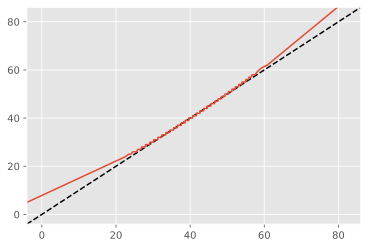

In [29]:
#@title  { run: "auto", vertical-output: true }

EPS = 1e-12
p = np.linspace(0+EPS, 1-EPS, 1000)
# lb = 1
lb = 41 #@param {type:"slider", min:1, max:101, step:10}
q = scipy.stats.norm(lb, np.sqrt(lb)).ppf(p)
plt.plot(q, q, 'k--', label='normal approxmation')
plt.plot(q, scipy.stats.poisson(lb).ppf(p), label='poisson')
xmin = ymin = min(q)
xmax = ymax = max(q)
plt.axis([xmin, xmax, ymin, ymax]);

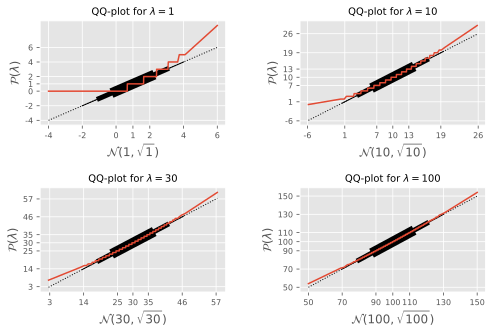

In [30]:
#@title complete plotting { vertical-output: true }
#@markdown Illustration of 1, 2, 3 and 5$\sigma$ central and symmetric intervals with decreasing widths of black lines
def plotting_EX(ax, lb):
  norm = scipy.stats.norm
  n = 1_000
  p = lambda s: np.linspace(norm.cdf(-s), norm.cdf(s), n)
  
  # plotting normal quantiles
  Qn = lambda mu, s: norm(mu, np.sqrt(mu)).ppf(p(s))
  for s, ls, w in zip([   5,    3,    2,    1], # sigmas
                      ['k:', 'k-', 'k-', 'k-'], # line styles
                      [   1,    1,    5,   10]  # line widths
                      ):
    ax.plot(Qn(lb, s), Qn(lb, s), ls, lw=w)
  
  # plotting poisson quantiles
  Qp = lambda mu, s: scipy.stats.poisson(mu).ppf(p(s))
  ax.plot(Qn(lb, 5), Qp(lb, 5))
  
  ax.set_title(f"QQ-plot for $\lambda={lb:d}$", fontsize=10)
  ax.set_xlabel(f'${{\\cal N}}({lb},\\sqrt{{{lb}}})$')
  ax.set_ylabel(r'${\cal P}(\lambda)$')
  list_xlabels = np.round(norm(lb,np.sqrt(lb)).ppf(norm(0,1).cdf([-5, -3, -1, 0, 1, 3, 5])),0)
  ax.set_xticks(list_xlabels)
  ax.set_xticklabels(np.int32(list_xlabels), fontdict={'fontsize': 8})
  ax.set_yticks(list_xlabels)
  ax.set_yticklabels(np.int32(list_xlabels), fontdict={'fontsize': 8})
  pass

fig, ax = plt.subplots(2, 2, figsize=(8, 5))
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
for ax, lb in zip(ax.flatten(), [1, 10, 30, 100]):
  plotting_EX(ax, lb)


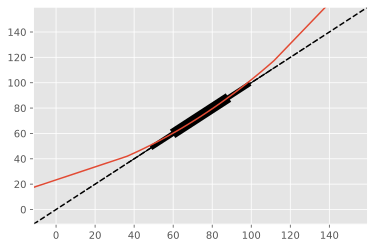

In [31]:
#@title $\chi^2$ vs. Normal { run: "auto", vertical-output: true }
ndof = 74 #@param {type:"slider", min:1, max:500, step:1}

EPS = 1e-12
xp = np.linspace(0+EPS, 1-EPS, 1000)
q = scipy.stats.norm(ndof, np.sqrt(2*ndof)).ppf(xp)
plt.plot(q, q, 'k--')
norm = scipy.stats.norm
n = 1_000
p = lambda s: np.linspace(norm.cdf(-s), norm.cdf(s), n)
# plotting normal quantiles
Qn = lambda mu, s: norm(ndof, np.sqrt(2*ndof)).ppf(p(s))
for s, ls, w in zip([   5,    3,    2,    1], # sigmas
                    ['k:', 'k-', 'k-', 'k-'], # line styles
                    [   1,    1,    5,   10]  # line widths
                    ):
  plt.plot(Qn(lb, s), Qn(lb, s), ls, lw=w)

plt.plot(q, scipy.stats.chi2(ndof).ppf(xp))
xmin = ymin = min(q)
xmax = ymax = max(q)
plt.axis([xmin, xmax, ymin, ymax]);

## <font color="darkred">Transforming a random variable</font>

Let us assume $Y = \varphi(X)$, with $\varphi$, some function. We know the PDF of $X$, $f_X$. 

**Question**: What is the PDF of $Y$, $f_Y$?

**Answer**:
We use the CDF, which are usual functions (beware, PDF are densities, and carry imformation about density change in variable transformation while CDF act as standard mathematical function in variable transformation).

Conservation of probabilties in a change of variable $y=\varphi(x)$:

$$f_X(x)\;dx = f_{Y}(y)\;dy$$

or

$$F_X(x) = F_{Y}(y)$$

$F_Y(y) = {\mathbb P}(Y<y) = {\mathbb P}(\varphi(X)<y)$

- If $\varphi$ is monotonically increasing and invertible, and we note $\varphi^{-1}$ it's inverse, we have:
$F_Y(y) = {\mathbb P}(Y\leqslant y) = {\mathbb P}(X\leqslant\varphi^{-1}(y))=F_{X}(\varphi^{-1}(y))$, then

$$f_{Y}(y) = \frac{\partial F_X({\varphi^{-1}(y))}}{\partial y} = \frac{f_X(\varphi^{-1}(y))}{\varphi^{\prime}(\varphi^{-1}(y))}$$

- If $\varphi$ is monotonically decreasing and invertible, pay attention, we have:
$F_Y(y) = {\mathbb P}(Y\leqslant y) = {\mathbb P}(X\geqslant\varphi^{-1}(y))=1-{\mathbb P}(X<\varphi^{-1}(y))=1-F_{X}(\varphi^{-1}(y))$, then

$$f_{Y}(y) = -\frac{\partial F_X({\varphi^{-1}(y))}}{\partial y} = -\frac{f_X(\varphi^{-1}(y))}{\varphi^{\prime}(\varphi^{-1}(y))}$$



Taking back the example from the lectures on [basic concepts of statistics](https://indico.in2p3.fr/event/26179/timetable/#1-basic-concepts-of-statistics) of Romain: if $X$ follows a normal distribution with mean 0 and variance 1, what is the PDF of $Y=e^X$?

ANSWER: $\frac{\phi(\ln y)}{e^{\ln y}} = \frac{1}{y}\phi(\ln y)$ where $\phi$ is the PDF of the standard normal distribution: $\phi(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$

In [32]:
def fY(y):
  return scipy.stats.norm.pdf(np.log(y), loc=0, scale=1)/y

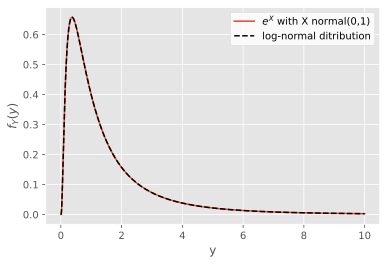

In [33]:
y = np.linspace(0+1e-12, 10, 1_000)
plt.plot(y, fY(y), label='$e^{X}$ with X normal(0,1)')
plt.plot(y, scipy.stats.lognorm.pdf(y,1), 'k--', label='log-normal ditribution')
plt.xlabel('y')
plt.ylabel('$f_Y(y)$')
plt.legend(facecolor='white');

NOTE: if the $\varphi: x\mapsto y$ transformation is not monotonic (monotonic means either increasing or decreasing, not both), you have to split up the interval in $x$ into subintervals where $\varphi$ would be monotonic and define:

 $$f_{Y}(y) = \sum_{\varphi(x)=y}\frac{f_X(x)}{\varphi^{\prime}(x)}$$

 A typical example is $Y=X^2$ where $\varphi(x)=x^2$.

  $$f_{Y}(y) = \sum_{\varphi(x)=y}\frac{f_X(x)}{\varphi^{\prime}(x)} = \frac{1}{2\sqrt{y}}\left(f_X\left(\sqrt{y}\right) + f_X\left(-\sqrt{y}\right)\right)$$ 


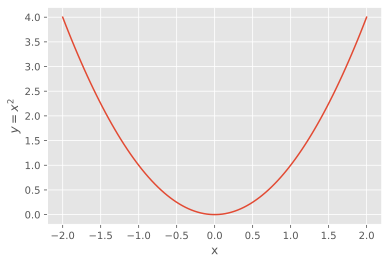

In [34]:
x = np.linspace(-2, 2, 100)
plt.plot(x, x**2)
plt.xlabel('x')
plt.ylabel('$y=x^2$');

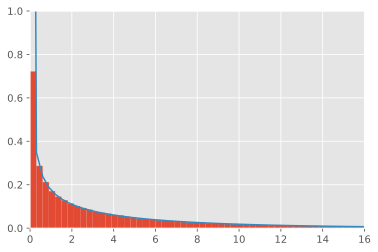

In [35]:
distrib = scipy.stats.norm(loc=0, scale=2)
X = distrib.rvs(size=100_000)
y = np.linspace(0.001, 30, 100);
f = distrib.pdf
plt.hist(X**2, bins=100, range=(0,30), density=True)
plt.plot(y, (f(np.sqrt(y))+f(-np.sqrt(y)))/(2*np.sqrt(y)))
plt.axis([0, 16, 0, 1]);

NOTE: be careful however with the display of `plt.hist` with the density option. The histogram is normalized to the bin range and not to the full sampling space. For instance if you take a subrange you might notice mismatch:

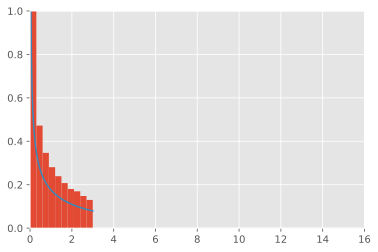

In [36]:
distrib = scipy.stats.norm(loc=0, scale=2)
X = distrib.rvs(size=100_000)
y = np.linspace(0.001, 3, 100);
f = distrib.pdf
plt.hist(X**2, bins=10, range=(0,3), density=True)
plt.plot(y, (f(np.sqrt(y))+f(-np.sqrt(y)))/(2*np.sqrt(y)))
plt.axis([0, 16, 0, 1]);

You can for instance renormalize the density to the specified bin range to alleviate this normalization mismatch:

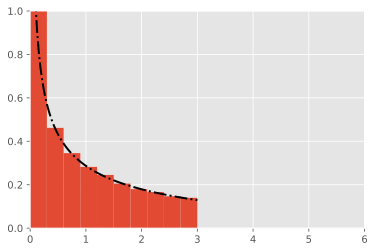

In [37]:
from scipy.integrate import quad
# Compute the integral of the PDF of Y on [0;3]
# quad function from scipy.integrate provide a doublet with the integral and the precision
# thus we take the first element which is the numerical integral we want
norm_factor = quad(
                lambda y: ( f(np.sqrt(y)) + f(-np.sqrt(y)) ) / ( 2*np.sqrt(y) ) ,
                0, 3)[0]

distrib = scipy.stats.norm(loc=0, scale=2)
X = distrib.rvs(size=100_000)
y = np.linspace(0.001, 3, 100);
f = distrib.pdf
plt.hist(X**2, bins=10, range=(0, 3), density=True)
# Update here with the renormalized PDF to the bin range:
plt.plot(y, 
         ( f(np.sqrt(y)) + f(-np.sqrt(y)) ) / ( 2*np.sqrt(y) * norm_factor ), 
         color= 'k', lw=2, ls='-.')
plt.axis([0, 6, 0, 1]);

---

<a name="sampling"></a>

#<font color="darkred">**II. Sampling**</font> [🔼](#index)

<font color="chocolate">*Objectives:*</font> Drawing random variables from a given distribution.

Drawing random variables from a given distribution
Sampling = generating a random sample from a given specified distribution.
First we use available ones. Then we can define our owns.
This is useful for the field called Monte Carlo simulations.

Idea: you can check many statistical problems and approximate complex simulations with simple sampling and histogramming/fitting.

You can for instance check approximations and properties of standard distributions:
- binomials: sums, same p, and not., compounding binomials = binomial.
- poisson: sum of poissons, but what about the difference of poisson random variables? 
- compounding a binomial with a poisson is poisson.
- poisson = approx binomial large N small p, finite lambda = Np (can be small) ex: PMTs photostatistics dark noise etc.
- Behaviour of Poisson, binomial, for large Np
- Normal mu sigma and standard normal copmarison. $X=\mu+\sigma Z$ where $Z$ is standard normal.
- CLT: Central Limit Theorem
- Chi2 ($\chi^2(n)$) as sum of squared $n$ standard normal.
- Student as a standard normal over $\sqrt{\chi^2/n}$
- Check transformation of random variables as we have already seen.
- Check a fitting engine, and estimator distributoins
- ...


## <font color="darkred">Standard distributions</font>

Find how to generate 1,000 values of a normal random variable with mean=3 and sigma=1.

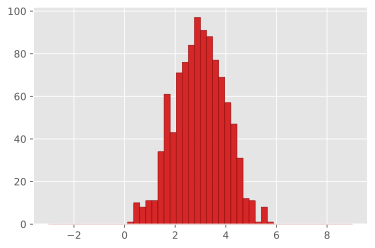

In [38]:
xvals = scipy.stats.norm(loc=3.0, scale=1.0).rvs(size=1_000)
plt.hist(xvals, bins=50, range=(-3,9), color='tab:red', edgecolor='darkred');

1. Using the binomial distribution, plot a histogram of a sample of the number of successes in 100 experiments of 10 trials with 80% of sucess each.

Notice: for a better reading of the plot, be careful with the bin centering, bin edges, 
bin width...

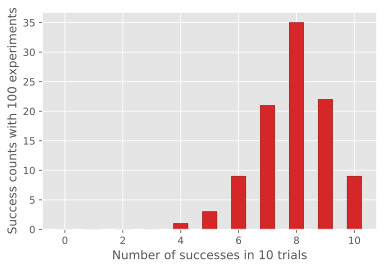

In [39]:
n_trial = 10
success_proba = 0.8
B = scipy.stats.binom(n_trial, success_proba)
n_experiments = 100

Brvs = B.rvs(n_experiments)

plt.hist(Brvs,bins=range(0,12), color='tab:red', edgecolor='darkred', align='left', rwidth=.5)
plt.xlabel('Number of successes in 10 trials')
plt.ylabel('Success counts with %d experiments' % n_experiments);

2. Give the mean, variance, skewness and kurtosis of a binomial with n=20 trials and success probability p=0.4. You just need 1 line of code for all this. How?


In [40]:
scipy.stats.binom.stats(20,.4, moments='mvsk')
B = scipy.stats.binom(n_trial, success_proba)

# Computing summary statistics one by one
print('Bino mean = %.2f, var= %.2f, std = %.2f' % (B.mean(), B.var(), B.std()))
# Computing several summary statistics at once
Bmean, Bvar, Bskew, Bkurt = B.stats('mvsk')
print('Bino mean = %.2f, var= %.2f, skew =%.2f, kurt = %.2f' % \
      (Bmean, Bvar, Bskew, Bkurt))



Bino mean = 8.00, var= 1.60, std = 1.26
Bino mean = 8.00, var= 1.60, skew =-0.47, kurt = 0.03


## <font color="darkred">Custom distribution - howtos</font>

You would like to define your own PDF?


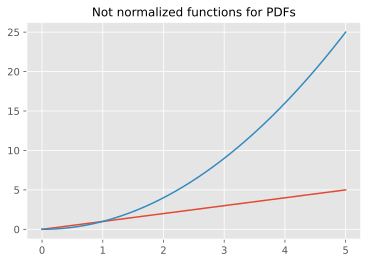

In [41]:
# A completely arbitrary (but positive) function
def my_custom_pdf(x, p):
  return np.power(x, p)
# Let's check its behaviour on some values
x = np.linspace(0,5,1000)
plt.plot(x, my_custom_pdf(x, 1))
plt.plot(x, my_custom_pdf(x, 2))
plt.title('Not normalized functions for PDFs', fontsize=12)
plt.show()

The question is how to sample from it?

Suppose $X$ follows a CDF $F_X$, whichi is continuous and strictly increasing. Then $F_X^{-1}$ is well defined as:

$F^{-1}(u) = x$ if and only if $F(x)=u$ for $0<u<1$.

Then de CDF of $Y=F_X(X)$ at $u\in[0;1]$ is:

$$F_{Y}(u)={\mathbb P}(F_{X}(X)\leqslant u)={\mathbb P}(X\leqslant F_{X}^{-1}(u))=F_X(F_X^{-1}(u))=u$$

Then 

$f_Y(u)=1$ if $0<u<1$ and $0$ otherwise. So $F_{X}(X)$ is uniformly distributed. Thus if we take a uniform random varialbe $U$ on $[0;1]$, $F_X^{-1}(U)$ is distributed according to $f_X$.

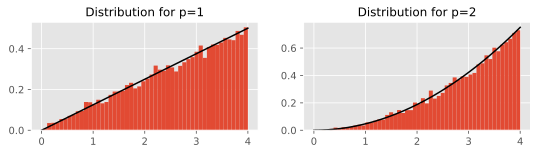

In [42]:
# Let's generate random samples from them. How?
from scipy.interpolate import interp1d 
x = np.linspace(0, 4, 1000)

# Quick and dirty quantile definition
par1 = 1
fx = my_custom_pdf(x, par1) # not normalized...
Fx = np.cumsum(fx)/np.sum(fx) # Computing the CDF
Qx = interp1d(Fx, x, kind='linear')
p = scipy.stats.uniform.rvs(size= 10_000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,2))
ax1.hist(Qx(p), bins=50, density=True)
ax1.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax1.set_title(f'Distribution for p=%.0f' % par1, fontsize=12)

par2 = 2
fx = my_custom_pdf(x, par2)
Fx = np.cumsum(fx)/np.sum(fx)
Qx = interp1d(Fx, x, kind='linear')

ax2.hist(Qx(p), bins=50, density=True)
ax2.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax2.set_title(f'Distribution for p=%.0f' % par2, fontsize=12)
plt.show()

You can even imagine to get a extremely regular sample. Instead of drawing random values for $p$ from the uniform distribution in $[0;1]$ you can use a equally spaced array for $p$

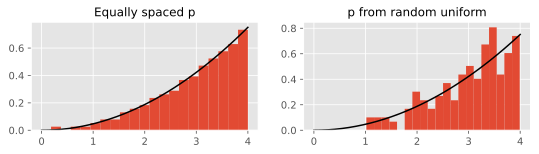

In [43]:
nsample = 200

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,2))
p = np.linspace(0+1e-4, 1-1e-4, nsample)
ax1.hist(Qx(p), bins=20, density=True)
ax1.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax1.set_title('Equally spaced p', fontsize=12)

np.random.seed(seed=123456)
p = scipy.stats.uniform.rvs(size= nsample)
ax2.hist(Qx(p), bins=20, density=True)
ax2.plot(x, np.array(fx)/np.sum(fx[0:-1]*np.diff(x)), color='k')
ax2.set_title('p from random uniform', fontsize=12)
plt.show()

This kind of trick can be used to check calculations with random variables with lower size samples without fluctuations for "debugging purposes"...

## <font color="darkred">Making use of the quantile function for binning</font>

Text(0.5, 0.98, 'Different binning definitons: impact of uneven binning on type of histogram')

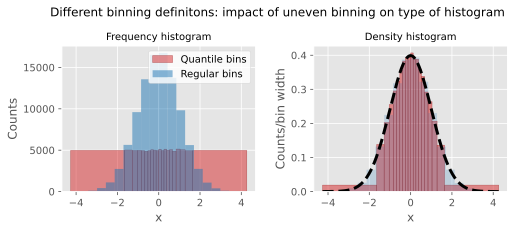

In [44]:
X = scipy.stats.norm

r = X.rvs(size = 100000)
nbins = 20
p = np.linspace(0+1e-5,1-1e-5,nbins+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
plt.subplots_adjust(wspace=.3, top=0.8)
ax1.hist(r, bins=X.ppf(p), density=False,
         color='tab:red', edgecolor='darkred',  alpha=.5,
         label='Quantile bins')
xmin, xmax = X.ppf([min(p), max(p)])
bins_eq = np.linspace(xmin, xmax, nbins+1)
ax1.hist(r, bins=bins_eq, density=False,
         color='tab:blue', edgecolor='none', alpha=.5,
         label='Regular bins')
ax1.set_title('Frequency histogram', fontsize=10)
ax1.legend(facecolor='w')
ax1.set_ylabel('Counts')
ax1.set_xlabel('x')

ax2.hist(r, bins=X.ppf(p), density=True,
         color='tab:red', edgecolor='darkred',  alpha=.5)
xmin, xmax = X.ppf([min(p), max(p)])
bins_eq = np.linspace(xmin, xmax, nbins+1)
ax2.hist(r, bins=bins_eq, density=True, 
         color='tab:blue', edgecolor='none', alpha=.2)
x = np.linspace(xmin,xmax,1000)
ax2.plot(x, X.pdf(x), lw=3, ls='--', color='k')
ax2.set_title('Density histogram', fontsize=10)
ax2.set_ylabel('Counts/bin width')
ax2.set_xlabel('x')
fig.suptitle('Different binning definitons: impact of uneven binning on '+ \
              'type of histogram', fontsize=12)

Using the quantile (inverse cumulative distribution) to define the bin widths, our collected data sample should look flat with a frequency binning. This means that every bin is expected to have the same statistical fluctuations. It could reveal convenient for graphical check up and for fitting (homeskedastic, i.e. same variance). And we can recover the probability density shape by drawing the density histogram. Both definitions are very convenient.

From the PDF and the sample of size 20, Draw the sample quantile as a function of the theoretical quantile. [QQplot] 

In [45]:
mu = 1
sigma = .5
X = scipy.stats.norm(loc=mu, scale=sigma)
n = 20
r = X.rvs(size = n)

1. The observed quantiles `Qobs` are simply the ordered observed values of the random sample.

In [46]:
Qobs = np.sort(r)

2. One of the simplest definition of the theoretical quantiles are the the quantiles of the probability density taken at the corresponding fraction of the observed value with respect to the full sample size: the associated theoretical quantile to $x_{(i)}$ it $Q_X\left(\frac{i}{n}\right)$

In [47]:
Qth = [X.ppf(i/n) for i in range(1,n+1)]

**Quantile variance**

We have a sample $(x_1,\ldots,x_n)$ of values from a random variable $X$. For simplicity in notations we assume the sample is ordered in increasing values of $x_i$: $x_1<x_2<\ldots<x_k<\ldots<x_n$.

We define $p_k=F_X(x_k)$, then we have
$x_k = F_X^{-1}(p_k)$. We want to know the error $\delta x_k$ on $x_k$:

$$\delta x_k = \delta F_X^{-1}(p_k) = F_X^{-1}(p_k^{\star}+\delta p_k) -  F_X^{-1}(p_k^{\star})$$

where $p_k^{\star}$ is the true value and $\delta p_k$ is the error on $p_k$ due to the finite sampling size of the sample.

Then 

$$F_X^{-1}(p_k^{\star}+\delta p_k) -  F_X^{-1}(p_k^{\star})\simeq \frac{1}{f_X\left(F_X^{-1}(p^\star_k)\right)} \delta p_k$$

Thus to first order, we have

$${\rm Var}\left[\delta x_k\right] \simeq \left(\frac{1}{f_X\left(F_X^{-1}(p^\star_k)\right)}\right)^2 {\rm Var}\left[\delta p_k\right]$$

The error on $p_k$ is the difference between the estimated $\hat{p}_k$ and the true $p_k^{\star}$: $\delta p_k = \hat{p}_k-p^\star_k$. And $\hat{p}_k$ is simply the number of $x_i$ values such that $x_i<x_k$ divided by the total number of $x_i$ values: $\hat{p}_k = k/n$. 

For a given $x$ value, the number $k$ of $x_k$ below $x$ is a random variable. It's a binomial random variable ${\cal B}(n, p^\star)$. Then we have:

$${\rm Var}\left[\hat{p}\right] = {\rm Var}\left[\delta p+p^\star\right] = {\rm Var}\left[\delta p\right] = \frac{1}{n^2}{\rm Var}\left[k\right]=\frac{np^\star(1-p^\star)}{n^2}=\frac{p^\star(1-p^\star)}{n}$$

Thus, we get the following estimate of $\delta x_k$:

$$\delta x_k \simeq \frac{\sqrt{p^\star(1-p^\star)}}{\sqrt{n} \times f_X\left(F_X^{-1}(p^\star)\right)}$$

In [48]:
def QQvar(X,p,n):
  # Variance approximation of the quantiles
  return p*(1-p)/(n*(X.pdf(X.ppf(p)))**2)

In [49]:
# print('QQvar = ', QQvar(X,[.2 .3],10))
std = np.asarray([ np.sqrt(QQvar(X,(i+1)/(n+1),len(r))) for i, _ in enumerate(r)])

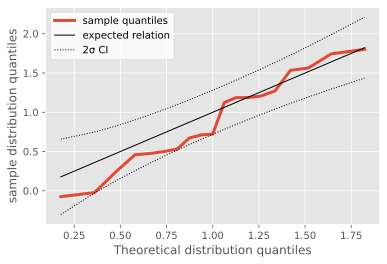

In [50]:
plt.plot(Qth, Qobs, linewidth=3, label="sample quantiles")
plt.plot(Qth, Qth, 'k', linestyle='-', linewidth=1, label="expected relation")
plt.plot(Qth, Qth+2*std, 'k', linestyle=':', linewidth=1, label="2σ CI")
plt.plot(Qth, Qth-2*std, 'k', linestyle=':', linewidth=1)
plt.xlabel('Theoretical distribution quantiles')
plt.ylabel('sample distribution quantiles')
plt.legend(facecolor='w');

A QQplot is a convenient way to check a sample is following a given theoretical prediction. Here we check the sample is following a normal distribution.

Write a simple Monte Carlo simulation to compute the error band otbained through error propagation method above.



In [51]:
nsim = 1_000_000
r = X.rvs(size = (nsim, n))
Qobs_MC = np.sort(r, axis=1)
std_MC = np.std(Qobs_MC, axis=0)

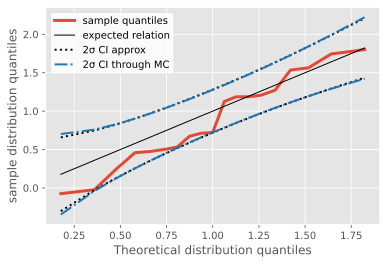

In [52]:
plt.plot(Qth, Qobs, linewidth=3, label="sample quantiles")
plt.plot(Qth,Qth, 'k', linestyle='-', linewidth=1, label="expected relation")
plt.plot(Qth,Qth+2*std, 'k', linestyle=':', linewidth=2, label="2σ CI approx")
plt.plot(Qth,Qth-2*std, 'k', linestyle=':', linewidth=2)
plt.plot(Qth,Qth+2*std_MC, 'tab:blue', linestyle='-.', linewidth=2, label="2σ CI through MC")
plt.plot(Qth,Qth-2*std_MC, 'tab:blue', linestyle='-.', linewidth=2)
plt.xlabel('Theoretical distribution quantiles')
plt.ylabel('sample distribution quantiles')
plt.legend(facecolor='w');

We see that our Taylor expansion approximation to compute the standard error of the quantiles is very good in this case. This interval gives a quick uncertainty band to assess if the empirical distribution from the sample is following the theoretical prediction.

## <font color="darkred">Averages and CLT, the Central Limit Theorem</font>

**Central Limit Theorem in short**: For any distribution with finite variance, adding up a large amount or independent random variables $X_i$ with the same distribution (with finite variance) lead to a normal distribution of the sum of the variables $\sum_{i=1}^N X_i$. This is the central limit theorem (CLT).

We demonstrate below two cases: the coin flip of the dice roll. You can experiment choosing in the menu below and run the next cell.

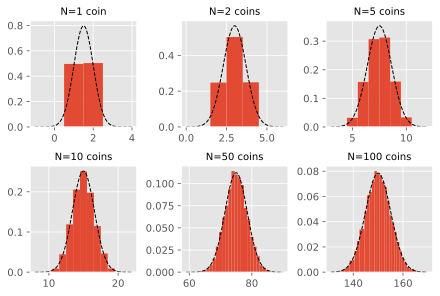

In [53]:
experiment = "coin" #@param ["coin", "dice"]

numIterations = np.asarray([1, 2, 5, 10, 50, 100]); #number of i.i.d RVs

maxNumForExperiment = {'dice': 6, 'coin': 2} #max numbers represented on dice or coins
nSamp=10000

k = maxNumForExperiment[experiment]

fig, fig_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)

for i,N in enumerate(numIterations):
    y = np.random.randint(low=1, high=k+1, size=(N,nSamp)).sum(axis=0)
    row = i//3
    col=i%3
    bins=np.arange(start=min(y), stop=max(y)+2, step=1)
    fig_axes[row, col].hist(y, bins=bins, density=True, align='left')
    plural = lambda n: 's' if n>1 else ''
    fig_axes[row, col].set_title('N={} {}'.format(N,experiment+plural(N)), fontsize=10)
    x = np.linspace(min(y)-2, max(y)+2, 100)
    fig_axes[row, col].plot(x, scipy.stats.norm.pdf(x, loc=np.mean(y),\
                                              scale=np.std(y)),\
                            color='k', linewidth=1, linestyle='--')

plt.show()

An important consequence is the convergence of the average:
* as $1/\sqrt{n}$ (random dispersions of the mean decrease with $n$ as $1/\sqrt{n}$) if each component of the sum has a finite variance;
* and to a normal distribution (CLT, see above).

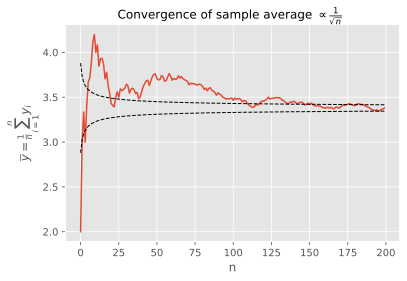

In [54]:
#@title CLT convergence with $1/\sqrt{n}$
y = np.random.randint(low=1, high=7, size=(200,1)).cumsum(axis=0)
ymean = y[-1]/len(y)

plt.plot([S/(i+1) for i, S in enumerate(y)])
plt.plot(ymean + .5/np.sqrt(np.arange(1,len(y)+1)),\
         color='k', linestyle='--', linewidth=1)
plt.plot(ymean - .5/np.sqrt(np.arange(1,len(y)+1)),\
         color='k', linestyle='--', linewidth=1)
plt.title(r'Convergence of sample average $\propto\frac{1}{\sqrt{n}}$ ', fontsize=12)
plt.xlabel('n')
plt.ylabel(r'$\overline{y} = \frac{1}{n} \sum_{i=1}^n y_i$')
plt.show()
# for i, S in enumerate(y):
#   print('i= %d, S= %.2f' % (i,S/(i+1)))

---

<a name="inference"></a>

#<font color="darkred">**III. Statistical inference**</font> [🔼](#index)
If we define the probability we can sample from it. This is a sampling distribution. If the sampling distribution is fully known (no free parameters), we can check its consistency with the data. Otherwise we have to find a way to specify the unknowns.



Usually the sampling distribution is known up to some parameters. Like Poisson distribution depends on a parameter, $\lambda$, in the following way: $${\cal P}(n;\lambda)=\frac{\lambda^n}{n!}e^{-\lambda}$$

The natural question is when we observe some $n$ then called $n_{\rm obs}$ which value of $\lambda$ is the most likely to have produce this observation.

For instance, if we have $n_{\rm obs}=[1, 3, 2, 5, 3, 4, 1, 7]$ and if we assume this sample was drawn from a Poisson distribution ${\cal P}(n;\lambda)$, among the possible values of the $\lambda$ parameter, which one is the most likely given these observed data? This is the type of question we can answer in statistical inference.

## <font color="darkred">The Maximum Likelihood Estimator (MLE)</font>



Maximum likelihood is a method of estimating the parameters of an assumed probability distribution $P(x;\theta)$, given some observed data $x_{\rm obs}$.

The best estimation, $\hat{\theta}$, of unknown $\theta$ is achieved by maximizing a likelihood function ${\cal L}(\theta) = P(x_{\text{obs}}; \theta)$ so that, under the assumed statistical model, the observed data is most probable:

$$\hat{\theta} = \underset{\theta}{\arg\max} \, {\cal L}(\theta),$$
where $\hat{\theta}$ is the value of $\theta$ which maximizes $\cal L(\theta)$.


## <font color="darkred">Fitting an exponential distribution</font>

Here the goal is to fit data with likelihood. And to pay attention to the likelihood normalization. We will be fitting an exponential distribution and an exponential distribution with cuts...



### <font color="darkred">Part 1</font>

Generate a sample of size 1,000 from an exponential distribution $f_X(x,\lambda) = \lambda e^{-\lambda x}$ with $\lambda = 1/2$. Find for this, the appropriate function in `scipy.stats` package. Call `X` the variable which contains this data sample.

1. Check that the mean and the variance are indeed from what you expect from an exponential distribution. Did you pay attention to the arguments to call this function such as `loc` and `scale`?

2. Draw a histogram of this sample `X` (Use `matplotlib.pyplot.hist`).

3. Get used to `bins`, `range`, `width`, `density` options. Try them and check the behaviour. Especially look at the y-axis scale.

4. Plot superimposed the histogram and the exponential PDF from the function definition. How can you make the PDF and the histogram look more alike for what concerns the y-scale?

In [55]:
lb = .5
X = scipy.stats.expon(loc=0,scale=1/lb).rvs(size=1_000, random_state=12345)
print('mean = %.2f' % np.mean(X))
print('var = %.2f' % np.var(X))

mean = 2.01
var = 3.78


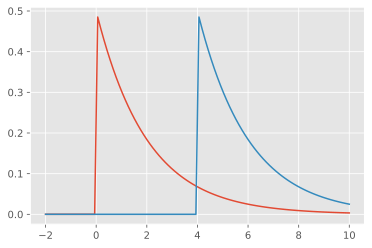

In [56]:
x = np.linspace(-2,10,100)
plt.plot(x,scipy.stats.expon(loc=0,scale=1/lb).pdf(x));
plt.plot(x,scipy.stats.expon(loc=4,scale=1/lb).pdf(x));

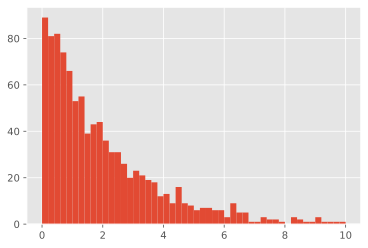

In [57]:
bin_edges = np.linspace(0,10,51)
plt.hist(X, bins=bin_edges);

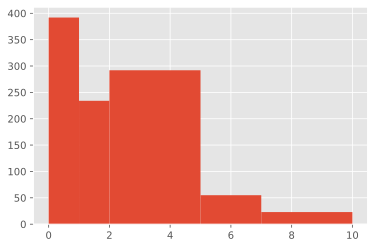

In [58]:
bin_edges = (0, 1, 2, 5, 7, 10)
plt.hist(X, bins=bin_edges);

Given the following bin edges [0, 1, 2, 5, 7, 10], write the command to plot a density histogram which should be comparable with the probability density. There is especially an option to provide related to the density status of the histogram.

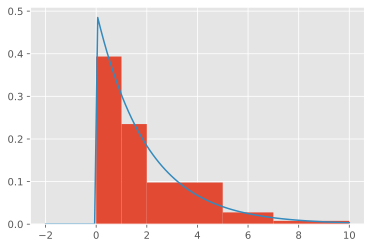

In [59]:
bin_edges = (0, 1, 2, 5, 7, 10)
plt.hist(X, bins=bin_edges, density=True)
plt.plot(x, scipy.stats.expon(loc=0,scale=1/lb).pdf(x));

### <font color="darkred">Part 2</font>

We want now to fit the data set `X` we defined in the previous Question.
You will have to use `minimize` function from `scipy.optimize`. Read the documentation.

You have to define:
1. the PDF of the exponential PDF ($f_X(x;\lambda)$)



In [60]:
def exp_pdf(x,lb):
  return lb*np.exp(-lb*x)

2. the loglikelihood ($-2\log f_X(x;\lambda)$) of the dataset with this PDF.



In [61]:
def llexp(lb):
  return -2*np.log(exp_pdf(X,lb)).sum()


Then minimize the loglikelihood and plot the result (the histogram with the data and the best fit PDF i.e. the PDF with parameter value obtained from the minimization process of the loglikelihood).


In [62]:
from scipy.optimize import minimize
soln = minimize(llexp,1, bounds=[(0.000001,None)])
soln

      fun: 3394.808492708353
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 6
   status: 0
  success: True
        x: array([0.49787598])

Plot the log likelihood and a parabolic approximation close to the minimum.

(0.4, 0.6, -1.0, 10.0)

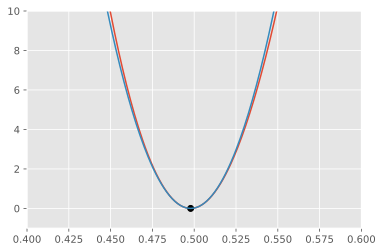

In [63]:
lb = np.linspace(0.1, .9, 1_000)
plt.plot(lb, [llexp(lb)-llexp(soln.x[0]) for lb in lb]);
plt.plot(soln.x[0], 0, 'ko')
plt.plot(lb, [(lb-soln.x[0])**2/(2*soln.hess_inv.todense()[0]) for lb in lb]);
plt.axis([.4, .6, -1, 10])

When we have a parabolic approximation we have ${\ell(\lambda)}\simeq\left(\frac{\lambda-\hat{\lambda}}{\sigma_{\lambda}}\right)^2$

When $\lambda$ is $\sigma_\lambda$ away of $\hat{\lambda}$ then $\ell(\lambda=\hat{\lambda}+\sigma_\lambda) = \ell(\hat{\lambda})+1$. For $2\sigma_\lambda$ it's $\ell(\lambda) = \ell(\hat{\lambda})+4$ and so on.

Find the $\sigma_\lambda$ using `scipy.optimize.fsolve`

In [64]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
loglik = interp1d(lb, [llexp(lb)-llexp(soln.x[0]) for lb in lb], kind='cubic',
                  bounds_error= False, fill_value='extrapolate')

sigma_level = 2
g = lambda x: loglik(x) - sigma_level**2
roots = [fsolve(g, .2)[0], fsolve(g, .8)[0]]
roots

[0.46704785515431246, 0.530031737817076]

(0.4, 0.6, -1.0, 10.0)

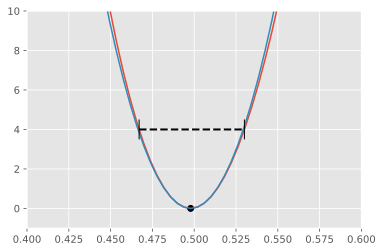

In [65]:
lb = np.linspace(0.3, .7, 100)
plt.plot(lb, [llexp(lb)-llexp(soln.x[0]) for lb in lb]);
plt.plot(soln.x[0], 0, 'ko')
plt.plot(lb, [(lb-soln.x[0])**2/(2*soln.hess_inv.todense()[0]) for lb in lb])
plt.plot(roots, [sigma_level**2, sigma_level**2],
         'k--', marker='|', linewidth=2, markersize=20)
plt.axis([.4, .6, -1, 10])

### <font color="darkred">Part 3</font>

Assume now that `X` is still from the exponential distribution with $\lambda=1/2$ defined above, but for some experimental reason you only have access to data bewteen 1 and 5.

1. Use the first question instructions to generate a sample of `X` values of size 1,000. Then select only the cases between 1 and 5. For instance use 
`X[(X>1)&(X<5)]`. 
2. Fit this new dataset with the likelihood defined in previous question. Do you find the same estimate? Why?
3. You would have expected do get the same estimate of $\lambda$ since this is the same generating process. What biases the estimator?
4. Check the normalization of the likelihood on the sample space ($x$ values). The likelihood should always be normalized to 1 on the sample space. Define therefore a new likelihood correctly normalized for $x$ values between 1 and 5. Do you get now a reasonable estimator of $\lambda$?

In [66]:
Y = X[(X>1)&(X<5)]

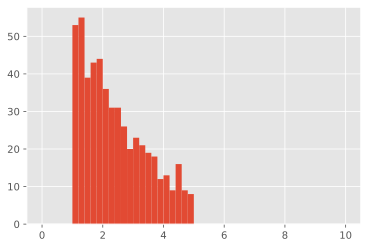

In [67]:
plt.hist(Y, bins=50, range=(0,10));

In [68]:
def exp_pdf2(x,lb):
  return lb*np.exp(-lb*x)

def llexp2(lb):
  return -2*np.log(exp_pdf2(Y,lb)).sum()
# from scipy.optimize import minimize_scalar as mn_scal
# res2 = mn_scal(llexp,bounds=(0.000001,10), method='bounded')
soln2 = minimize(llexp2, 1, bounds=[(0.000001,None)])
soln2

      fun: 1973.455660031517
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00025011])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 6
   status: 0
  success: True
        x: array([0.41648346])

In [69]:
def exp_pdf3(x,lb):
  return (x>1)*(x<5)*lb*np.exp(-lb*x)/(np.exp(-1*lb)-np.exp(-5*lb))
def llexp3(lb):
  return -2*np.log(exp_pdf3(Y,lb)).sum()

soln3 = minimize(llexp3,1,bounds=[(0.000001,None)])
print(soln3.x[0])


0.4756343977548638


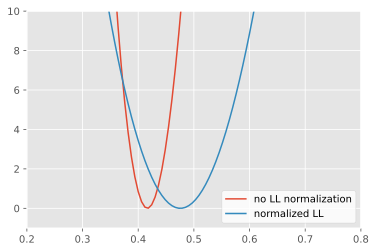

In [70]:
lb_val = np.linspace(.2,.8,100)
plt.plot(lb_val, [llexp2(lb)-llexp2(soln2.x[0]) for lb in lb_val], label='no LL normalization')
plt.plot(lb_val, [llexp3(lb)-llexp3(soln3.x[0]) for lb in lb_val], label='normalized LL')
# sigma_lb = np.sqrt(2*soln3.hess_inv.todense())
# plt.plot(lb_val, [(lb-soln3.x)**2 for lb in lb_val]/sigma_lb**2, \
#          linestyle = '--', linewidth=3, label='parabolic approximation')
plt.axis([0.2, 0.8, -1, 10])
plt.legend(facecolor='w');

There is a significant difference when the likelihood is not properly normalized on sample space. Beware of this recurrent trap! Always use correctly normalized probabilities, especially when the normalization factor depends on the parameter to be fitted.

## <font color="darkred">Binning the data</font>

From the previous example of the exponential distribution, you can try to bin the sample.

Each bin should follow a Poisson distribution given by integral content of the PDF of $X$ random variable (the exponential) over each bin.

Fit the binned sample with a a Poisson log likelihood for each bin.

Add a flat background.

Profile out the background: minimize with respect to background total number




## <font color="darkred">Chi square $\chi^2$</font>

In the large sample case, distributions can often be well approximated by a normal distribution (thanks to the Central Limit Theorem). The likelihood can then be approximated by
$$
{\cal L}(\theta) = \prod_{i=1}^{n_{\text{bins}}} {\cal P}(n_i, \mu_i(\theta)) \approx \prod_{i=1}^{n_{\text{bins}}} \frac{1}{\sqrt{2\pi}\sigma_i}\exp\left(-\frac{1}{2} \frac{(n_i - \mu_i(\theta))^2}{\sigma_i^2} \right)
$$

And then taking -2 log of the likelihood

$$
{\ell}(\theta) = -2 \log {\cal L}(\theta) = \sum_{i=1}^{n_{\text{bins}}}\left(\frac{n_i - \mu_i(\theta)}{\sigma_i}\right)^2 + {\rm constant}
$$
which is just the least squares. When each $n_i$ follows a normal distribution of mean $\mu_i(\theta)$ and variance $\sigma_i^2$, then $\ell(\theta)$ follows a $\chi^2$ with $n_{\rm bins}$ degrees of freedom.

This is an important motivation for using $\ell=-2\log{\cal L}$ : it can be defined for any likelihood, but in the normal case, it reduces to the $\chi^2$.

Wilk's theorem:

When the sample size is large, the Wilk's theorem state that $\ell=-2\log{\cal L}$ should follow a $\chi^2$ distribution. This theorem is often used to obtain quickly asymptotic confidence intervals with $\chi^2$ distribution.

A remark concerning the degrees of freedom: we have a number of bins and a number of fitted parameters. The minimum chi square $\chi^2_{\rm min}$ provides model adequacy to data, also referred as Goodness of Fit (GoF): follows a $\chi^2$ with $N_{\rm bins}-N_{\rm par}$ degrees of freedom. $\Delta\chi^2$ provides a specific model best fit with respect to all possible values of the parametsrs. $\Delta\chi^2$ follows a $\chi^2$ distribution with $N_{\rm par}$ degrees of freedom.

When the sample size is large, the Wilk's theorem state that $\ell=-2\log{\cal L}$ should follow a $\chi^2$ distribution. This theorem id often used to obatin quickly asymptotic confidence intervals. $\chi^2$ distribution. Degrees of freedom. Number of bins. Number of fitted parameters. $\chi^2_{\rm min}$ and $\Delta\chi^2$. $\chi^2_{\rm min}$ provides model adequacy to data, also referred as Goodness of Fit (GoF): follows a $\chi^2$ with $N_{\rm bins}-N_{\rm par}$ degrees of freedom. $\Delta\chi^2$ provides a specific model best fit with respect to all possible values of the parametsrs. $\Delta\chi^2$ follows a $\chi^2$ distribution with $N_{\rm par}$ degrees of freedom.

To assess the fit quanlity the $\chi^2_{\rm min}$ is a good quantity to monitor. It should be close to the number of degrees of freedom $n_{\rm dof}=N_{\rm bins}-N_{\rm par}$ with standard variations $\pm\sqrt{2n_{\rm dof}}$ at the $1\sigma$ level. Don't forget to look at the residuals: $\varepsilon_i=n_i-\mu_i(\hat{\theta})$. If your fit and your hypotheses are correct, then $\varepsilon_i/\sigma_i$ should follow a standard normal. You can use a qqplot as done above to check this.

We end here with this introduction part.

# <font color="darkred">**To go further**</font>

There is an excellent complement to this hands-on session with the lectures from Nicolas BERGER and the notebooks he developped (exercises and solutions are provided). You may find all this series materials at ["Statistical methods for particle physics"](https://indico.in2p3.fr/event/23254/timetable/?view=standard). Either you can run the notebooks on Binder as explained or download and open them on Colaboratory. From the use in Colaboratory you can convert the notebook ".ipynb" into an standard python file ".py" that you can download and run on your local environement if you prefer. Up to you to continue your path in learning statistics the way you want. And always remember to test your solutions and understanding with simple toy models. Have fun!!!